In [9]:
import os
import re
import time
#import folderstats
#import chardet
import textract
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def extract_text_from_df(file):
    text = None
    
    if not file['folder']:
        try:
            text = textract.process(file['path'])
        except:
            pass
        
    return text

In [14]:
[f for f in os.listdir('../data/t5')]

['.DS_Store',
 '000001.doc',
 '000002.doc',
 '000003.doc',
 '000004.doc',
 '000005.doc',
 '000006.doc',
 '000007.doc',
 '000008.ppt',
 '000009.pdf',
 '000010.pdf',
 '000011.pdf',
 '000012.pdf',
 '000013.pdf',
 '000014.pdf',
 '000015.pdf',
 '000016.pdf',
 '000017.pdf',
 '000018.pdf',
 '000019.pdf',
 '000020.pdf',
 '000021.pdf',
 '000022.pdf',
 '000023.pdf',
 '000024.pdf',
 '000025.pdf',
 '000026.pdf',
 '000027.pdf',
 '000028.pdf',
 '000029.pdf',
 '000030.xls',
 '000031.xls',
 '000034.xls',
 '000035.xls',
 '000036.xls',
 '000037.xls',
 '000038.xls',
 '000039.xls',
 '000040.xls',
 '000041.xls',
 '000042.xls',
 '000043.xls',
 '000044.xls',
 '000045.xls',
 '000046.xls',
 '000047.xls',
 '000048.xls',
 '000049.xls',
 '000050.xls',
 '000051.xls',
 '000052.xls',
 '000053.xls',
 '000054.xls',
 '000055.xls',
 '000056.html',
 '000057.html',
 '000059.html',
 '000060.html',
 '000063.html',
 '000064.html',
 '000065.html',
 '000066.html',
 '000067.html',
 '000069.html',
 '000070.html',
 '000071.html',

In [12]:
df[df.raw_text.isna()]

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,raw_text
0,2,t5/000001.doc,1.0,doc,0,2020-09-02 12:44:51,2020-09-02 12:08:29,2020-09-02 12:40:22,False,NaN,0,1,501,NaN
7,9,t5/000008.ppt,8.0,ppt,304640,2020-08-27 22:14:16,2011-02-08 15:37:40,2020-08-27 22:14:16,False,NaN,0,1,501,NaN
70,72,t5/000081.text,81.0,text,13150,2020-08-27 22:14:07,2011-02-08 15:37:52,2020-08-27 22:13:40,False,NaN,0,1,501,NaN
71,73,t5/000083.text,83.0,text,7671,2020-08-27 22:14:07,2011-02-08 15:37:52,2020-08-27 22:13:40,False,NaN,0,1,501,NaN
72,74,t5/000086.text,86.0,text,26270,2020-08-27 22:14:07,2011-02-08 15:37:52,2020-08-27 22:13:40,False,NaN,0,1,501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,4431,t5/004972.ppt,4972.0,ppt,180224,2020-08-27 22:22:19,2011-02-08 15:54:16,2020-08-27 22:13:41,False,NaN,0,1,501,NaN
4433,4435,t5/004976.pdf,4976.0,pdf,6981,2020-08-27 22:22:19,2011-02-08 15:54:16,2020-08-27 22:13:41,False,NaN,0,1,501,NaN
4434,4436,t5/004977.pdf,4977.0,pdf,88198,2020-08-27 22:22:19,2011-02-08 15:54:16,2020-08-27 22:13:41,False,NaN,0,1,501,NaN
4441,4443,t5/004984.pdf,4984.0,pdf,6990,2020-08-27 22:22:19,2011-02-08 15:54:18,2020-08-27 22:13:41,False,NaN,0,1,501,NaN


In [4]:
df['raw_text'] = df.apply(lambda file: extract_text_from_df(file), axis=1)

WARNING *** file size (31309) not 512 + multiple of sector size (512)
WARNING *** file size (742989) not 512 + multiple of sector size (512)


In [7]:
df['raw_text'].iloc[19]

b'CCASE:\nSOL (MSHA) V. WESTERN SAND & GRAVEL\nDDATE:\n19930223\nTTEXT:\n\n\x0c~298\nSECRETARY OF LABOR,\nMINE SAFETY AND HEALTH\nADMINISTRATION (MSHA),\nPetitioner\nv.\n\nWESTERN SAND & GRAVEL,\nRespondent\n\n:\n:\n:\n:\n:\n:\n:\n:\n:\n:\n\nCIVIL PENALTY PROCEEDING\nDocket No. WEST 92-524-M\nA. C. No. 45-03119-05509\n\nTenino Pit\n\nDECISION APPROVING SETTLEMENT\nBefore:\n\nJudge Merlin\n\nThis case is before me upon a petition for assessment of the\ncivil penalties for ten violations under section 105(d) of the\nFederal Mine Safety and Health Act of 1977. The parties have filed\na joint motion to approve settlements. A reduction in penalties\nfrom $738 to $642 is proposed. Nine of the ten citations involved\nin this case were assessed $50 and are all non significant and\nsubstantial. The parties have agreed to settle these for the\noriginal amounts. I approve the findings for these violations and\nthe proposed penalty amounts.\nWith respect to remaining citation, the Solicitor has ag

In [7]:
df = pd.read_csv('../data/raw_text_test.csv', index_col='Unnamed: 0')

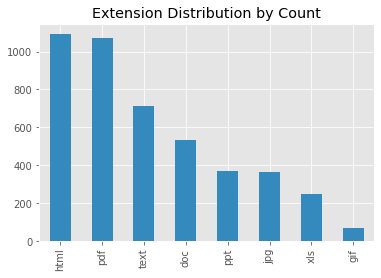

In [8]:
with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by Count');